In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline
import missingno as msno
pd.pandas.set_option('display.max_columns',None)
import scipy.stats as stats

In [2]:
df=pd.read_csv(r'C:/Users/pbann/Downloads/data.csv',sep='\,')
df

C:\Users\pbann\AppData\Local\Temp/ipykernel_28684/1977646327.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(r'C:/Users/pbann/Downloads/data.csv',sep='\,')


,"""footfall",atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,"fail"""
0,"""0",7,7,1,6,6,36,3,1,"1"""
1,"""190",1,3,3,5,1,20,4,1,"0"""
2,"""31",7,2,2,6,1,24,6,1,"0"""
3,"""83",4,3,4,5,1,28,6,1,"0"""
4,"""640",7,5,6,4,0,68,6,1,"0"""
...,...,...,...,...,...,...,...,...,...,...
939,"""0",7,7,1,6,4,73,6,24,"1"""
940,"""0",7,5,2,6,6,50,6,24,"1"""
941,"""0",3,6,2,7,5,43,6,24,"1"""
942,"""0",6,6,2,5,6,46,7,24,"1"""


In [3]:
df.isnull().sum()

"footfall      0
atemp          0
selfLR         0
ClinLR         0
DoleLR         0
PID            0
outpressure    0
inpressure     0
temp           0
fail"          0
dtype: int64

In [4]:
df.dtypes

"footfall      object
atemp           int64
selfLR          int64
ClinLR          int64
DoleLR          int64
PID             int64
outpressure     int64
inpressure      int64
temp            int64
fail"          object
dtype: object

In [5]:
df = df.rename(columns={'"footfall':'footfall','fail"':'fail'})

In [6]:
df.head()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,"""0",7,7,1,6,6,36,3,1,"1"""
1,"""190",1,3,3,5,1,20,4,1,"0"""
2,"""31",7,2,2,6,1,24,6,1,"0"""
3,"""83",4,3,4,5,1,28,6,1,"0"""
4,"""640",7,5,6,4,0,68,6,1,"0"""


In [7]:
import re
parts = df['footfall'].str.split('"')
df['footfall'] = parts.str[1].str.extract('(\d+)')
df['footfall']

0        0
1      190
2       31
3       83
4      640
      ... 
939      0
940      0
941      0
942      0
943     18
Name: footfall, Length: 944, dtype: object

In [8]:
df['fail'].unique()

array(['1"', '0"'], dtype=object)

In [9]:
df['fail'] = df['fail'].map({'1"':1,'0"':0})

In [10]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [11]:
df['footfall']=df['footfall'].astype(int)

In [12]:
df.dtypes

footfall       int32
atemp          int64
selfLR         int64
ClinLR         int64
DoleLR         int64
PID            int64
outpressure    int64
inpressure     int64
temp           int64
fail           int64
dtype: object

In [13]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


<function matplotlib.pyplot.show(close=None, block=None)>

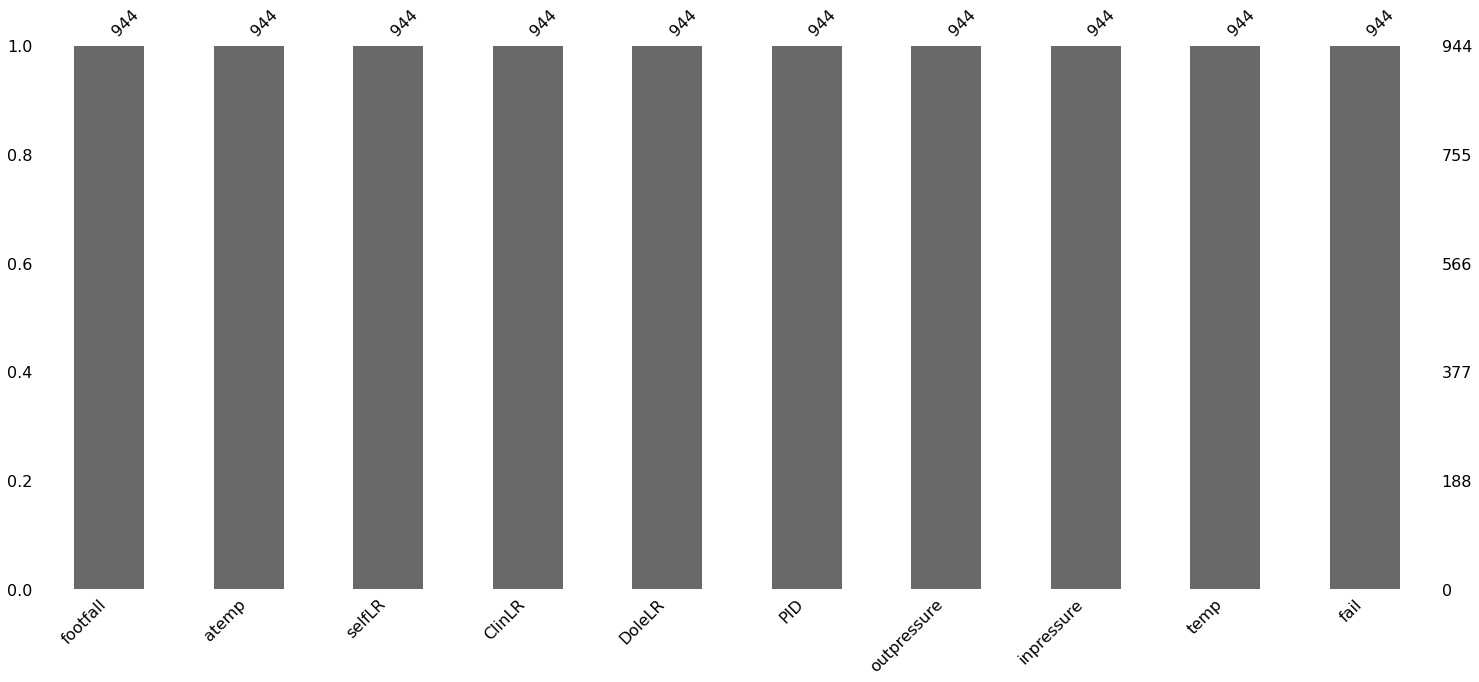

In [14]:
import missingno as msno
msno.bar(df)
plt.show

# observation: dataset has no missing values.

In [15]:
df['fail'].value_counts()

0    551
1    393
Name: fail, dtype: int64

# observation : data set is balanced

In [16]:
df.describe()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


# univariate Analysis:

<AxesSubplot:xlabel='inpressure', ylabel='count'>

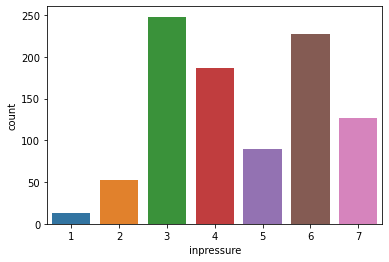

In [17]:
sns.countplot(x=df['inpressure'])

<AxesSubplot:xlabel='PID', ylabel='count'>

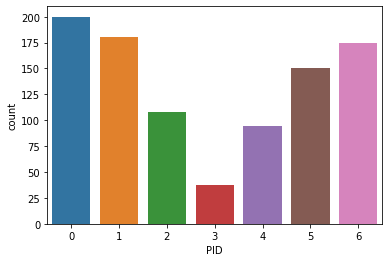

In [18]:
sns.countplot(x=df['PID'])

<AxesSubplot:xlabel='ClinLR', ylabel='count'>

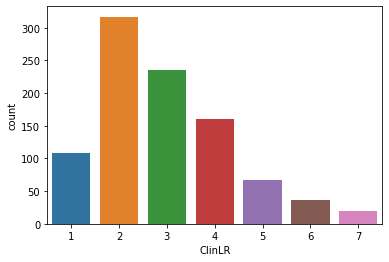

In [19]:
sns.countplot(x=df['ClinLR'])

<AxesSubplot:xlabel='temp', ylabel='count'>

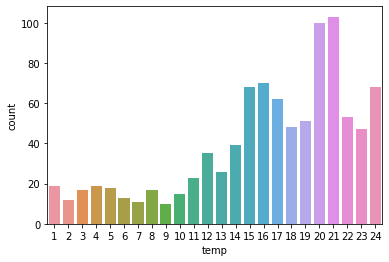

In [20]:
sns.countplot(x=df['temp'])

<AxesSubplot:xlabel='inpressure', ylabel='count'>

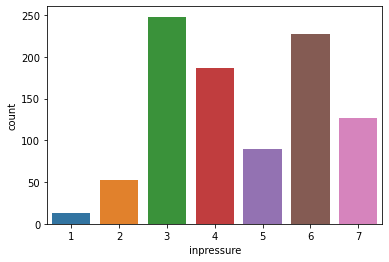

In [21]:
sns.countplot(x=df['inpressure'])

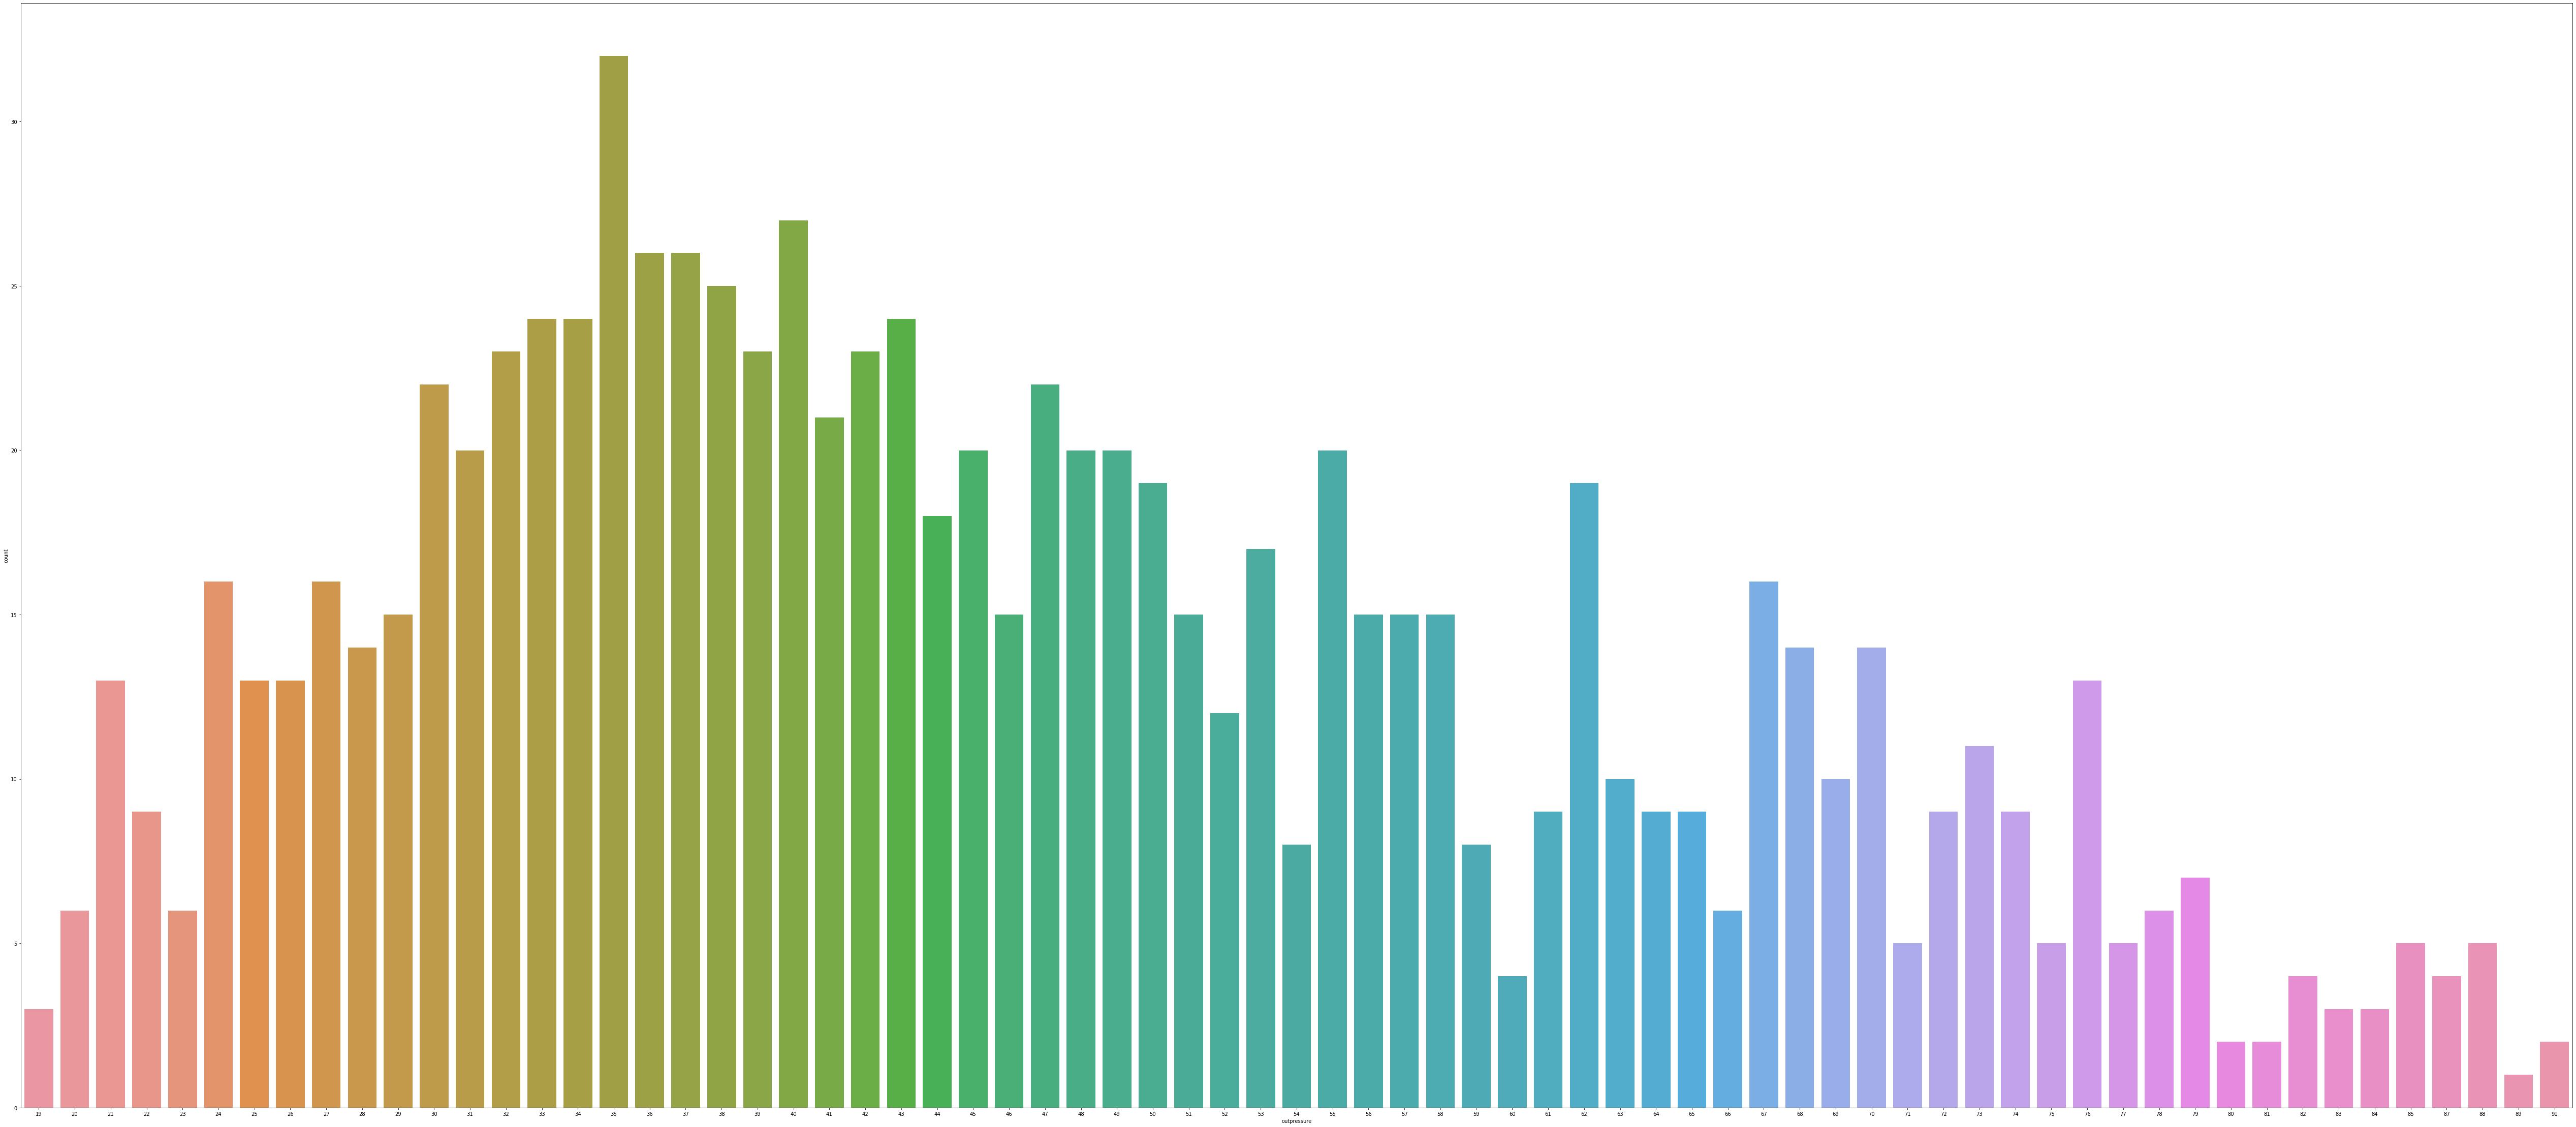

In [22]:

fig=plt.figure(figsize=(90,40))
sns.countplot(x=df['outpressure'])
plt.rcParams.update({'font.size': 10})

# Byvariate analysis:

<AxesSubplot:xlabel='fail', ylabel='PID'>

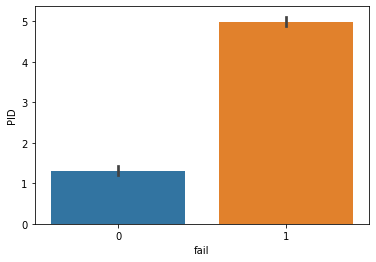

In [23]:
sns.barplot(y='PID',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='footfall'>

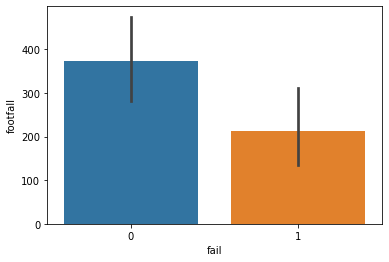

In [24]:
sns.barplot(y='footfall',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='atemp'>

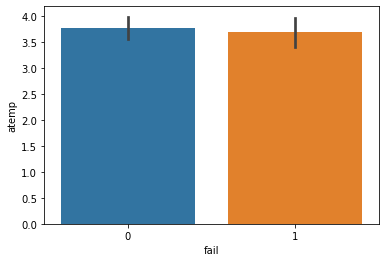

In [25]:
sns.barplot(y='atemp',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='selfLR'>

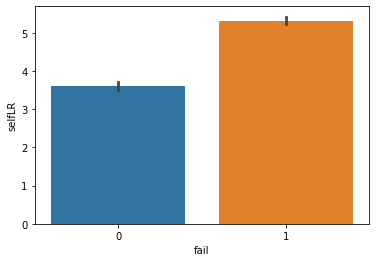

In [26]:
sns.barplot(y='selfLR',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='ClinLR'>

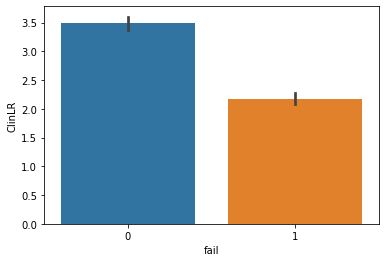

In [27]:
sns.barplot(y='ClinLR',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='DoleLR'>

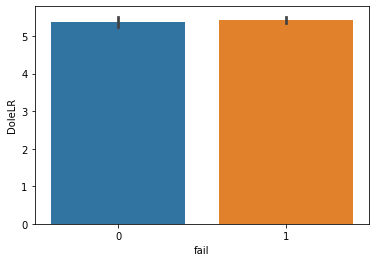

In [28]:
sns.barplot(y='DoleLR',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='outpressure'>

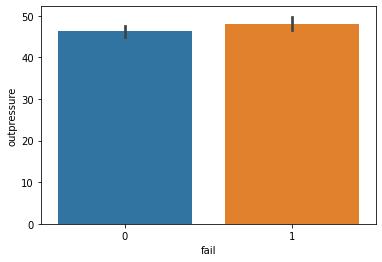

In [29]:
sns.barplot(y='outpressure',x='fail',data=df)

<AxesSubplot:xlabel='fail', ylabel='inpressure'>

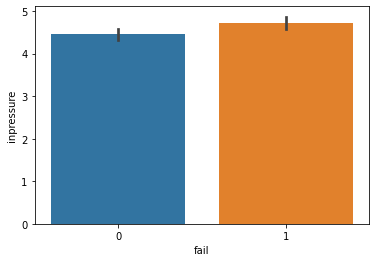

In [30]:
sns.barplot(y='inpressure',x='fail',data=df)

# Observation: 
## features = [ footfall,selfLR,ClinLR,PID,temp ] these columns shows more impact on output if focused on these failure cases can be optimised.

In [31]:
df.corr()

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
footfall,1.000000,0.020457,-0.065816,0.019453,0.025638,-0.089590,-0.043720,-0.003869,-0.018009,-0.073066
atemp,0.020457,1.000000,-0.010855,0.002142,-0.013956,-0.052369,0.408784,-0.058109,-0.062568,-0.014462
selfLR,-0.065816,-0.010855,1.000000,-0.156884,-0.090010,0.618570,0.094656,-0.105868,0.034328,0.583238
ClinLR,0.019453,0.002142,-0.156884,1.000000,-0.352915,-0.399477,-0.032549,-0.206416,-0.225122,-0.466574
DoleLR,0.025638,-0.013956,-0.090010,-0.352915,1.000000,0.048037,-0.026968,0.185739,0.143972,0.018855
PID,-0.089590,-0.052369,0.618570,-0.399477,0.048037,1.000000,0.008023,0.103628,0.208956,0.797329
outpressure,-0.043720,0.408784,0.094656,-0.032549,-0.026968,0.008023,1.000000,-0.158841,-0.078499,0.053668
inpressure,-0.003869,-0.058109,-0.105868,-0.206416,0.185739,0.103628,-0.158841,1.000000,0.372771,0.085624
temp,-0.018009,-0.062568,0.034328,-0.225122,0.143972,0.208956,-0.078499,0.372771,1.000000,0.190257
fail,-0.073066,-0.014462,0.583238,-0.466574,0.018855,0.797329,0.053668,0.085624,0.190257,1.000000


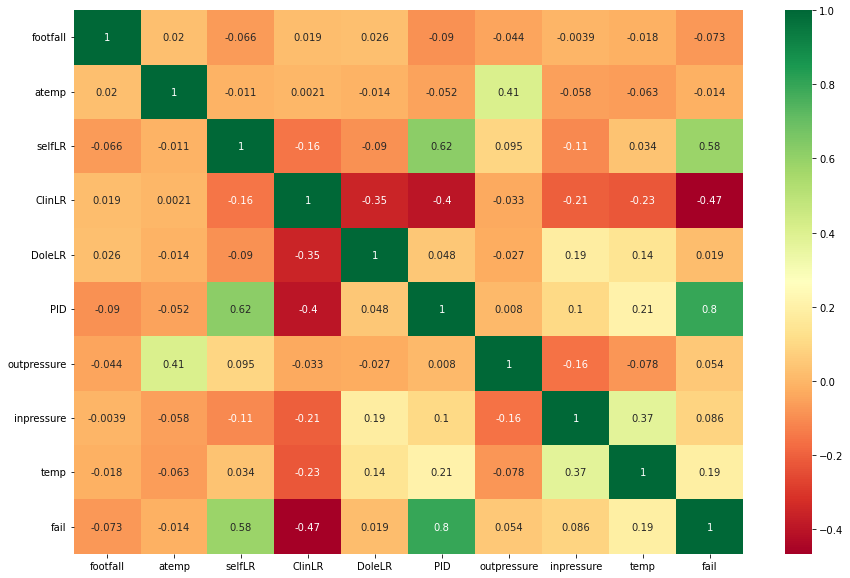

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")
plt.show()

# Observation: though data showing multi-colinearity we are not dropping any columns as we are not going to use algorythms that are sensitive to multicolinearity.  

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
X = df.drop(columns='fail',axis=1)
y=df['fail']

In [35]:
ordered_rank_features=SelectKBest(score_func=chi2,k=9)
ordered_feature=ordered_rank_features.fit(X,y)

In [36]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(X.columns)

In [37]:
features_rank = pd.concat([dfcolumns,dfscores],axis=1)

In [38]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,footfall,19258.483493
1,atemp,0.379213
2,selfLR,153.453429
3,ClinLR,133.709144
4,DoleLR,0.100140
5,PID,1090.099068
6,outpressure,15.572225
7,inpressure,3.872981
8,temp,74.611968


# Observation: DoeLR, atemp has least score which shows no importance,so dropping.

In [39]:
df

,footfall,atemp,selfLR,ClinLR,DoleLR,PID,outpressure,inpressure,temp,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [40]:
final_df = df.drop(['DoleLR','atemp'],axis=1)

In [41]:
final_df

,footfall,selfLR,ClinLR,PID,outpressure,inpressure,temp,fail
0,0,7,1,6,36,3,1,1
1,190,3,3,1,20,4,1,0
2,31,2,2,1,24,6,1,0
3,83,3,4,1,28,6,1,0
4,640,5,6,0,68,6,1,0
...,...,...,...,...,...,...,...,...
939,0,7,1,4,73,6,24,1
940,0,5,2,6,50,6,24,1
941,0,6,2,5,43,6,24,1
942,0,6,2,6,46,7,24,1


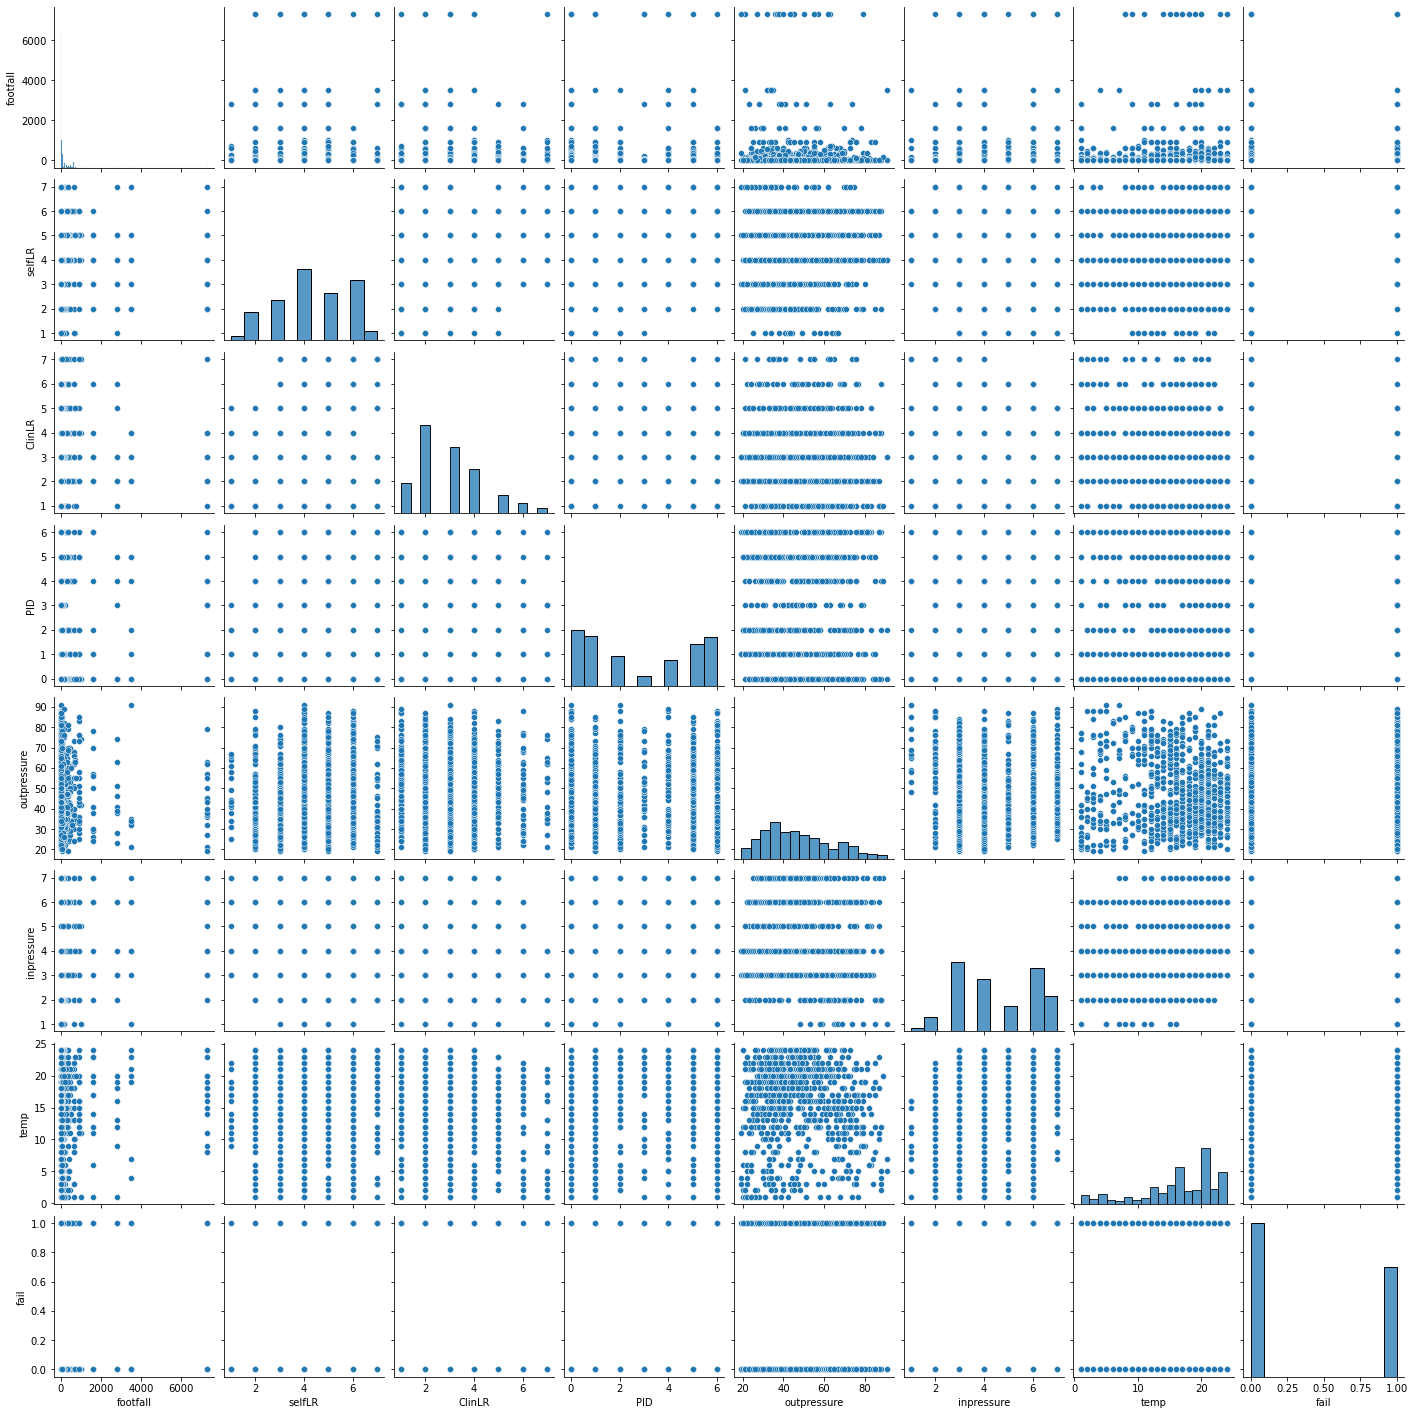

In [42]:
sns.pairplot(final_df)

In [43]:
X = df.drop(columns='fail',axis=1)
y=df['fail']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, f1_score

In [47]:
## Training the model
models={
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC()
}

In [49]:
for model_name,model in models.items():
    model.fit(X_train, y_train)
    print(model_name,'trained')

LogisticRegression trained
GaussianNB trained
KNeighborsClassifier trained
DecisionTreeClassifier trained
RandomForestClassifier trained
SVC trained


C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
for model_name,model in models.items():
    
    print(model_name)
    print("Train Scores")
    y_pred = model.predict(X_train)
    print("    Accuracy Score: {:.2f}".format(accuracy_score(y_train, y_pred)))
    print("    F1 Score: {:.2f}".format(f1_score(y_train, y_pred)))
    
    print("Test Scores")
    y_pred = model.predict(X_test)
    print("    Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
    print("    F1 Score: {:.2f}".format(f1_score(y_test, y_pred)))

    print("_______________________________")

LogisticRegression
Train Scores
    Accuracy Score: 0.90
    F1 Score: 0.88
Test Scores
    Accuracy Score: 0.95
    F1 Score: 0.95
_______________________________
GaussianNB
Train Scores
    Accuracy Score: 0.90
    F1 Score: 0.88
Test Scores
    Accuracy Score: 0.94
    F1 Score: 0.93
_______________________________
KNeighborsClassifier
Train Scores
    Accuracy Score: 0.85
    F1 Score: 0.80
Test Scores
    Accuracy Score: 0.74
    F1 Score: 0.70
_______________________________
DecisionTreeClassifier
Train Scores
    Accuracy Score: 1.00
    F1 Score: 1.00
Test Scores
    Accuracy Score: 0.87
    F1 Score: 0.85
_______________________________
RandomForestClassifier
Train Scores
    Accuracy Score: 1.00
    F1 Score: 1.00
Test Scores
    Accuracy Score: 0.96
    F1 Score: 0.96
_______________________________
SVC
Train Scores
    Accuracy Score: 0.59
    F1 Score: 0.00
Test Scores
    Accuracy Score: 0.56
    F1 Score: 0.00
_______________________________


In [52]:
confusion_matrix(y_train,pred)

NameError: name 'confusion_matrix' is not defined

In [55]:
from sklearn.model_selection import GridSearchCV
regression=LogisticRegression()
parameter={'C':[0.5,1,2,3,5,6,7,9,10,30,45],'penalty':['l1','l2','elasticnet']}
log_regressor=GridSearchCV(regression,parameter,scoring='accuracy',cv=5)

log_regressor.fit(X,y)


C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [56]:
prediction_log=log_regressor.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,roc_auc_score,f1_score

In [60]:
confusion_matrix(y_test,prediction_log)

array([[99,  6],
       [ 4, 80]], dtype=int64)

In [61]:
f1_score(y_test,prediction_log)

0.9411764705882352

# Conclusion:
# LogisticRegression,GaussianNB,RandomForestClassifier
## These Algorithms are giving best results but as the dataset is so small we cannot declare a signle algorithm as a best fit.